In [96]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [97]:
root_dir1 = '/mnt/nfs/dhasade/optml/logs/fedavg/synthetic/2_2_lr0.1/r6'
root_dir2 = '/mnt/nfs/dhasade/optml/logs/fedavg/synthetic/2_2_lr0.1/r5'

In [98]:
alg1, alg2 = 'iid', 'niid'

In [99]:
n = 25

In [100]:
train_losses = {}
train_loss_indexes = {}
test_losses = {}
test_loss_indexes = {}

In [101]:
for alg, root_dir in zip([alg1, alg2], [root_dir1, root_dir2]):
    train_file = os.path.join(root_dir, 'train.csv')
    test_file = os.path.join(root_dir, 'test.csv')

    df = pd.read_csv(train_file)
    train_losses[alg] = df['train_losses'][:n]
    train_loss_indexes[alg] = df['train_index'][:n]

    df1 = pd.read_csv(test_file)
    test_losses[alg] = df1['test_losses'][:n]
    test_loss_indexes[alg] = df1['test_index'][:n]


Text(0.5, 0.98, 'Perceptron Training')

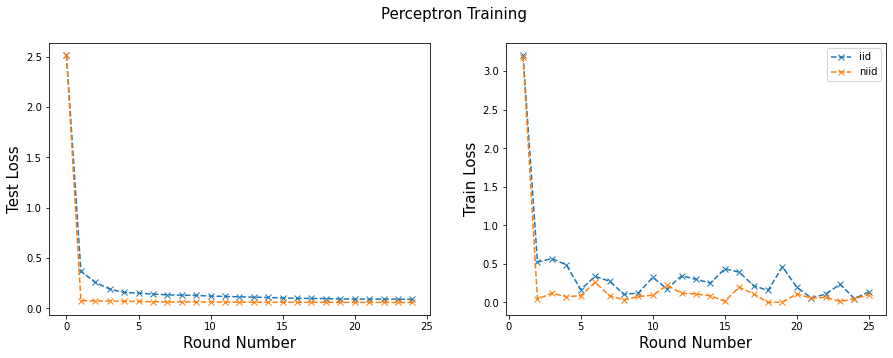

In [102]:
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 5))

for alg in [alg1, alg2]:
    axs2.plot(train_loss_indexes[alg], train_losses[alg], 'x--', label=alg)

    axs1.plot(test_loss_indexes[alg], test_losses[alg], 'x--', label=alg)

    # axs1.legend(fontsize=15)
    axs1.set_ylabel('Test Loss', fontsize=15)
    axs1.set_xlabel('Round Number', fontsize=15)
    # axs1.tick_params(axis='both', labelsize=12)
    # axs1.set_ylim(0.3, 0.8)

    axs2.set_ylabel('Train Loss', fontsize=15)
    axs2.set_xlabel('Round Number', fontsize=15)
    # axs2.tick_params(axis='both', labelsize=12)

plt.legend()
fig.suptitle('Perceptron Training', fontsize=15)
# plt.savefig('../logs/figures/perceptron_training_curve.jpg', dpi=300)

### Plotting the data points

In [59]:
import random
import json
import numpy as np

In [60]:
train_file = '../synthetic_data/train.json'
test_file = '../synthetic_data/test.json'

In [61]:
with open(train_file) as f:
    train_data = json.load(f)

In [62]:
with open(test_file) as f:
    test_data = json.load(f)

In [63]:
outlier_user = train_data['users'][-1]
normal_user = train_data['users'][0]

In [64]:
outlier_data = train_data['user_data'][outlier_user]
normal_data = train_data['user_data'][normal_user]

In [65]:
xs2, ys2 = outlier_data['x'], outlier_data['y']
xs1, ys1 = normal_data['x'], normal_data['y']

In [66]:
indices = random.choices(range(0, 100), k=30)

In [67]:
xs1_subsampled = np.array([xs1[indice] for indice in indices])
ys1_subsampled = np.array([ys1[indice] for indice in indices])
xs2_subsampled = np.array([xs2[indice] for indice in indices])
ys2_subsampled = np.array([ys2[indice] for indice in indices])

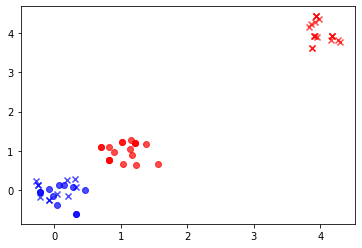

In [68]:
for x, y, label in zip(xs1_subsampled[:,0], xs1_subsampled[:, 1], ys1_subsampled):
    plt.scatter(x, y, color= 'red' if(label == 1.0) else 'blue', alpha=0.7)

for x, y, label in zip(xs2_subsampled[:,0], xs2_subsampled[:, 1], ys2_subsampled):
    plt.scatter(x, y, color= 'red' if(label == 1.0) else 'blue', marker='x', alpha=0.7)
